<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Boston-Housing-Prices-Regression-Modeling-with-Keras" data-toc-modified-id="Boston-Housing-Prices-Regression-Modeling-with-Keras-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Boston Housing Prices Regression Modeling with Keras</a></span></li><li><span><a href="#Purpose" data-toc-modified-id="Purpose-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Purpose</a></span></li><li><span><a href="#Load-libraries-and-data" data-toc-modified-id="Load-libraries-and-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load libraries and data</a></span></li><li><span><a href="#Helper-functions" data-toc-modified-id="Helper-functions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Helper functions</a></span></li><li><span><a href="#Inspect-and-visualize-the-data" data-toc-modified-id="Inspect-and-visualize-the-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Inspect and visualize the data</a></span></li><li><span><a href="#Model-the-data" data-toc-modified-id="Model-the-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model the data</a></span><ul class="toc-item"><li><span><a href="#Create-validation-data-set" data-toc-modified-id="Create-validation-data-set-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Create validation data set</a></span></li><li><span><a href="#Build-models" data-toc-modified-id="Build-models-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Build models</a></span><ul class="toc-item"><li><span><a href="#Build-model-function" data-toc-modified-id="Build-model-function-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Build model function</a></span></li><li><span><a href="#Initial-pass" data-toc-modified-id="Initial-pass-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Initial pass</a></span></li><li><span><a href="#Grid-search-hyperparameter-tuning" data-toc-modified-id="Grid-search-hyperparameter-tuning-6.2.3"><span class="toc-item-num">6.2.3&nbsp;&nbsp;</span>Grid search hyperparameter tuning</a></span><ul class="toc-item"><li><span><a href="#Alter-tuneModel-for-RandomizedSearchCV-support" data-toc-modified-id="Alter-tuneModel-for-RandomizedSearchCV-support-6.2.3.1"><span class="toc-item-num">6.2.3.1&nbsp;&nbsp;</span>Alter tuneModel for RandomizedSearchCV support</a></span></li><li><span><a href="#RandomizedSearchCV-hyperparameter-search" data-toc-modified-id="RandomizedSearchCV-hyperparameter-search-6.2.3.2"><span class="toc-item-num">6.2.3.2&nbsp;&nbsp;</span>RandomizedSearchCV hyperparameter search</a></span></li><li><span><a href="#Comments" data-toc-modified-id="Comments-6.2.3.3"><span class="toc-item-num">6.2.3.3&nbsp;&nbsp;</span>Comments</a></span></li><li><span><a href="#Tune-network-topology" data-toc-modified-id="Tune-network-topology-6.2.3.4"><span class="toc-item-num">6.2.3.4&nbsp;&nbsp;</span>Tune network topology</a></span></li><li><span><a href="#Graph-final-model-performance" data-toc-modified-id="Graph-final-model-performance-6.2.3.5"><span class="toc-item-num">6.2.3.5&nbsp;&nbsp;</span>Graph final model performance</a></span></li><li><span><a href="#Comments" data-toc-modified-id="Comments-6.2.3.6"><span class="toc-item-num">6.2.3.6&nbsp;&nbsp;</span>Comments</a></span></li></ul></li><li><span><a href="#Predictions" data-toc-modified-id="Predictions-6.2.4"><span class="toc-item-num">6.2.4&nbsp;&nbsp;</span>Predictions</a></span></li></ul></li></ul></li></ul></div>

<h1>Boston Housing Prices Regression Modeling with Keras</h1>

<img style="float: left; margin-right: 15px; width: 40%; height: 40%; " src="images/boston.jpg" />

Dataset source:  [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

# Purpose

The purpose of this write-up is to build upon the [first](https://nbviewer.jupyter.org/github/nrasch/Portfolio/blob/master/Machine-Learning/Python/04-Classic-Datasets/Model-02.ipynb) and [second](https://nbviewer.jupyter.org/github/nrasch/Portfolio/blob/master/Machine-Learning/Python/04-Classic-Datasets/Model-02.Keras.1.ipynb) write-ups involving the Boston housing prices dataset.  

Goals include:
* Utilize RandomizedSearchCV for hyperparameter tuning
* Feature selection with SelectKBest
* Examine algorithm performance visually

# Load libraries and data

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load libraries
import os

#import multiprocessing

import numpy as np
from numpy import arange

from math import sqrt

from matplotlib import pyplot

from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from pandas import DataFrame

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense

from keras.optimizers import Adam
from keras.optimizers import SGD

from keras.callbacks import History

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE

from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [4]:
dataFile = os.path.join(".", "datasets", "housing.csv")
data = read_csv(dataFile, header = 0, delim_whitespace = True)

# Helper functions

In [5]:
def corrTableColors(value):
    color = 'black'

    if value == 1:
        color = 'white'
    elif value < -0.7:
        color = 'red'
    elif value > 0.7:
        color = 'green'

    return 'color: %s' % color

In [6]:
def makeRange(start, stop, step = 1, multi = 1, dec = 1):
    vals = []
    for i in range(start, stop, step):
        vals.append(np.round(multi * i, decimals = dec))
        
    return vals

# Inspect and visualize the data

Please the [first Boston housing data's write-up](https://nbviewer.jupyter.org/github/nrasch/Portfolio/blob/master/Machine-Learning/Python/04-Classic-Datasets/Model-02.ipynb#Inspect-and-visualize-the-data) details on this topic.

# Model the data

## Create validation data set

In [112]:
# Seperate X and Y values
x = data.values[:, 0:len(data.columns) - 1]
y = data.values[:, len(data.columns) - 1]

# Uncomment if you want a smaller subset that runs faster for testing
# x = data.values[1:50, 0:len(data.columns) - 1]
# y = data.values[1:50, len(data.columns) - 1]

print("x.shape = ", x.shape)
print("y.shape = ", y.shape)

# Split out validation set -- 80/20 split
seed = 10
valSize = 0.2

xTrain, xVal, yTrain, yVal = train_test_split(x, y, test_size = valSize, random_state = seed)

print("--------")
print("xTrain.shape = ", xTrain.shape)
print("yTrain.shape = ", yTrain.shape)
print("xVal.shape = ", xVal.shape)
print("yVal.shape = ", yVal.shape)

x.shape =  (506, 13)
y.shape =  (506,)
--------
xTrain.shape =  (404, 13)
yTrain.shape =  (404,)
xVal.shape =  (102, 13)
yVal.shape =  (102,)


## Build models

### Build model function

More info on the `kernal_initializer`:  https://keras.io/initializers/

In [113]:
def buildModel(optimizer = 'Adam', lr = 0.001, decay = 0.0, epsilon = None, debug = False):
    
    opt = None
    
    model = Sequential()
    
    # kernel_initializer='normal' -> Initializer capable of adapting its scale to the shape of weights
    # bias_initializer -> 'zeros' (default per the docs) 
    model.add(Dense(20, kernel_initializer='normal', activation = 'relu'))
    model.add(Dense(10, kernel_initializer='normal', activation = 'relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    if optimizer.lower() == 'adam':
        opt = Adam(lr = lr, decay = decay, epsilon = epsilon)
    else:
        # Please don't ever use eval where you're recieving input from non-trusted sources!
        # A Jupyter notebook is OK; a public facing service is certainly not
        opt = eval(optimizer)()
    
    model.compile(loss = 'mean_squared_error', optimizer = opt)
    
    return model   

In [114]:
def wrapper(optimizer = 'Adam', lr = 0.001, decay = 0.0, epsilon = None):
    
    def buildModel():
    
        opt = None

        model = Sequential()

        # kernel_initializer='normal' -> Initializer capable of adapting its scale to the shape of weights
        # bias_initializer -> 'zeros' (default per the docs) 
        model.add(Dense(20, kernel_initializer='normal', activation = 'relu'))
        model.add(Dense(10, kernel_initializer='normal', activation = 'relu'))
        model.add(Dense(1, kernel_initializer='normal'))

        if optimizer.lower() == 'adam':
            opt = Adam(lr = lr, decay = decay, epsilon = epsilon)
        else:
            # Please don't ever use eval where you're recieving input from non-trusted sources!
            # A Jupyter notebook is OK; a public facing service is certainly not
            opt = eval(optimizer)()

        model.compile(loss = 'mean_squared_error', optimizer = opt)

        return model   
    
    return buildModel

### Initial pass

For this first pass an educated guess is taken for what might work well on the dataset.  This provides an initial baseline, and then we can tune the hyperparameters to hopefully improve the model.

In [18]:
# Define vars and init
folds = 10
seed = 10

np.random.seed(seed)

model = KerasRegressor(build_fn = buildModel, epochs = 200, batch_size = 5, verbose = 0)
kFold = KFold(n_splits = folds, random_state = seed)
results = cross_val_score(model, xTrain, yTrain, cv = kFold)

print("MSE: %.2f (%.2f)" % (results.mean(), results.std()))

MSE: -17.67 (7.86)


In [ ]:
# Define vars and init
folds = 10
seed = 10

np.random.seed(seed)

model = KerasRegressor(build_fn = wrapper(), epochs = 200, batch_size = 5, verbose = 0)
kFold = KFold(n_splits = folds, random_state = seed)
results = cross_val_score(model, xTrain, yTrain, cv = kFold)

print("MSE: %.2f (%.2f)" % (results.mean(), results.std()))

This is better then what the [previous](https://nbviewer.jupyter.org/github/nrasch/Portfolio/blob/master/Machine-Learning/Python/04-Classic-Datasets/Model-02.ipynb) write-up's models accomplished with no tuning as of yet:

<pre>
         Model    MSE  StdDev
3    scaledKNN -20.35   11.87
0     scaledLR -21.26    7.11
4   scaledCART -22.66    9.31
1  scaledLASSO -26.94   10.38
5    scaledSVR -28.52   13.98
2     scaledEN -28.60   11.65
</pre>

It does not; however, compare to the results achieved via the ensemble methods:

<pre>
       Model     MSE  StdDev
1  scaledGBM -9.700   5.342 
3  scaledET  -10.339  5.399 
2  scaledRF  -13.695  7.276 
0  scaledAB  -14.176  8.917
</pre>

### Grid search hyperparameter tuning

In a [previous write-up](https://nbviewer.jupyter.org/github/nrasch/Portfolio/blob/master/Machine-Learning/Python/04-Classic-Datasets/Model-02.Keras.1.ipynb) we utilized [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).  We'd like to now examine [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

We observed in the last write-up that the `KerasRegressor` estimator utilizing the `Adam` optimizer give us good results.  We'll continue working with this combination.

#### Alter tuneModel for RandomizedSearchCV support 

We need to alter the `tuneModel` function to support `RandomizedSearchCV`.

In [115]:
def tuneModel(modelName, modelObj, params, iterations = 20, returnModel = False, showSummary = True):
    # Init vars and params
    featureResults = {}
    featureFolds = 10
    featureSeed = 10
    
    np.random.seed(featureSeed)
    
    # Use MSE since this is a regression problem
    score = 'neg_mean_squared_error'

    # Create a Pandas DF to hold all our spiffy results
    featureDF = DataFrame(columns = ['Model', 'MSE', 'StdDev', 'Best Params'])

    # Create feature union (adding SelectKBest)
    features = []
    features.append(('Scaler', StandardScaler()))
    features.append(('SelectKBest', SelectKBest()))
    featureUnion = FeatureUnion(features)

    # Search for the best combination of parameters
    featureResults = RandomizedSearchCV(
        Pipeline(
            steps = [
                ('FeatureUnion', featureUnion),
                (modelName, modelObj)
        ]),
        param_distributions = params,
        n_iter = iterations,
        scoring = score,
        cv = KFold(n_splits = featureFolds, random_state = featureSeed),
        random_state = featureSeed
    ).fit(xTrain, yTrain)

    featureDF.loc[len(featureDF)] = list([
        modelName, 
        featureResults.best_score_,
        featureResults.cv_results_['std_test_score'][featureResults.best_index_],
        featureResults.best_params_,
    ])

    if showSummary:
        set_option('display.max_colwidth', -1)
        display(featureDF)
    
    if returnModel:
        return featureResults

#### RandomizedSearchCV hyperparameter search

OK, let's dig in and see what sort of parameter combinations `RandomizedSearchCV` might be able to find for us that provide good algorithm performance.  If we would have utilized `GridSearchCV` as in the [previous write-up](https://nbviewer.jupyter.org/github/nrasch/Portfolio/blob/master/Machine-Learning/Python/04-Classic-Datasets/Model-02.Keras.1.ipynb) we'd probably be here all week waiting for the combinations below to finish.  ;)

In [41]:
modelName = "housingModel"
modelObj =  KerasRegressor(build_fn = buildModel, verbose = 0)
params = {
    'housingModel__optimizer' : ['Adam'],
    'housingModel__epochs' : makeRange(200, 600, 50),
    'housingModel__batch_size' : makeRange(4, 68, 4),
    'FeatureUnion__SelectKBest__k': makeRange(1, xTrain.shape[1]),
    'housingModel__lr' : makeRange(1, 9, 1, .001, 3),
    'housingModel__epsilon' : makeRange(2, 8, 1, .5, 1),
}

set1 = tuneModel(modelName, modelObj, params, 10, True, True)

,Model,MSE,StdDev,Best Params
0,housingModel,-12.923,10.544,"{'housingModel__optimizer': 'Adam', 'housingModel__lr': 0.005, 'housingModel__epsilon': 1.5, 'housingModel__epochs': 350, 'housingModel__batch_size': 36, 'FeatureUnion__SelectKBest__k': 2}"


In [42]:
set_option('precision', 3)
DataFrame(set1.cv_results_).sort_values(by=['mean_test_score', 'std_test_score'], ascending=False)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_FeatureUnion__SelectKBest__k,param_housingModel__batch_size,param_housingModel__epochs,param_housingModel__epsilon,param_housingModel__lr,param_housingModel__optimizer,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
1,12.162,0.975,-12.923,-5.768,2,36,350,1.5,0.005,Adam,...,-39.856,-5.547,-9.200,-6.600,-25.413,-4.548,0.551,0.054,10.544,0.755
2,13.126,1.164,-13.062,-7.470,2,44,400,2.5,0.002,Adam,...,-33.158,-6.962,-6.769,-7.158,-29.250,-5.741,0.490,0.050,9.324,0.706
3,81.680,1.363,-14.276,-7.638,7,8,550,1.5,0.006,Adam,...,-30.706,-4.547,-6.938,-7.380,-31.150,-7.372,3.276,0.053,8.743,1.411
9,245.504,2.589,-14.861,-9.099,10,4,450,2,0.001,Adam,...,-24.559,-9.178,-12.357,-7.707,-21.949,-6.987,4.468,0.074,5.186,2.525
8,21.193,2.366,-15.473,-8.751,2,36,250,2.5,0.002,Adam,...,-43.321,-8.241,-8.194,-8.593,-30.608,-6.901,0.540,0.072,11.361,0.837
5,15.455,1.752,-15.506,-11.334,3,44,300,2,0.002,Adam,...,-30.041,-11.962,-9.391,-10.604,-28.895,-9.480,0.539,0.065,7.814,2.542
4,15.434,1.562,-15.764,-12.118,3,60,450,1,0.001,Adam,...,-23.848,-10.908,-8.697,-10.701,-28.050,-10.452,0.755,0.086,6.847,2.520
0,22.618,0.830,-16.429,-10.603,9,16,400,1,0.001,Adam,...,-37.575,-12.045,-9.254,-9.697,-36.836,-10.174,0.619,0.045,10.529,0.718
7,16.628,2.328,-17.656,-13.179,2,36,200,1.5,0.001,Adam,...,-31.712,-10.148,-9.390,-14.949,-43.857,-10.971,0.592,0.316,11.727,1.596
6,20.488,2.080,-18.634,-11.783,7,64,550,3.5,0.003,Adam,...,-36.326,-8.258,-11.253,-11.688,-42.961,-12.149,1.454,0.365,11.097,1.657


#### Comments

From the results above it's pretty clear we're likely at a point of diminishing returns for further tuning with this set of hyperparamter options. (I also tested a number of additional iterations outside of this notebook which further confirmed this conclusion.)

Likely the next logical step would be to experiment with the topology of the neural network itself such as adding additional layers and/or neurons, or we could simply disregard neural networks as an options for this problem and utilize one of the effective algorithms covered in previous write-ups. So let's do a few rounds of topology modification testing next, make a final model choice, examine some predictions, and then wrap up.

#### Tune network topology

In [ ]:
# do some NN funcs for wide, deep, deep/wide and run them

In [212]:
def tuneFinalModel(modelName, modelObj, params, iterations = 20, returnModel = False, showSummary = True):
    # Init vars and params
    featureResults = {}
    featureFolds = 10
    featureSeed = 10
    
    np.random.seed(featureSeed)
    
    # Use MSE since this is a regression problem
    score = 'neg_mean_squared_error'

    # Create a Pandas DF to hold all our spiffy results
    featureDF = DataFrame(columns = ['Model', 'MSE', 'StdDev', 'Best Params'])

    # Create feature union (adding SelectKBest)
    features = []
    features.append(('Scaler', StandardScaler()))
    features.append(('SelectKBest', SelectKBest()))
    featureUnion = FeatureUnion(features)

    # Search for the best combination of parameters
    featureResults = GridSearchCV(
        Pipeline(
            steps = [
                ('FeatureUnion', featureUnion),
                (modelName, modelObj)
        ]),
        param_grid = params,
        scoring = score,
        cv = KFold(n_splits = featureFolds, random_state = featureSeed),
    ).fit(xTrain, yTrain)

    featureDF.loc[len(featureDF)] = list([
        modelName, 
        featureResults.best_score_,
        featureResults.cv_results_['std_test_score'][featureResults.best_index_],
        featureResults.best_params_,
    ])

    if showSummary:
        set_option('display.max_colwidth', -1)
        display(featureDF)
    
    if returnModel:
        return featureResults

In [130]:
finalModelName = "housingModel"
finalModelObj =  KerasRegressor(build_fn = buildModel, verbose = 0)
finalParams = {
    'housingModel__optimizer' : ['Adam'],
    'housingModel__epochs' : [350],
    'housingModel__batch_size' : [36],
    'FeatureUnion__SelectKBest__k': [2],
    'housingModel__lr' : [0.005],
    'housingModel__epsilon' : [1.5],
}

final = tuneFinalModel(finalModelName, finalModelObj, finalParams, 2, True, True)

,Model,MSE,StdDev,Best Params
0,housingModel,-13.386,10.404,"{'FeatureUnion__SelectKBest__k': 2, 'housingModel__batch_size': 36, 'housingModel__epochs': 350, 'housingModel__epsilon': 1.5, 'housingModel__lr': 0.005, 'housingModel__optimizer': 'Adam'}"


#### Graph final model performance

In [59]:
# Concatenating multiple feature extraction methods
# http://scikit-learn.org/stable/auto_examples/plot_feature_stacker.html

# Init vars and params
folds = 10
seed = 10
np.random.seed(seed)
modelName = 'finalModel'

# Use MSE since this is a regression problem
score = 'neg_mean_squared_error'

# Create a Pandas DF to hold all our spiffy results
df = DataFrame(columns = ['Model', 'MSE', 'StdDev'])

# Build the model
model = KerasRegressor(
    build_fn = wrapper(
        optimizer = 'Adam', 
        lr = 0.005, 
        epsilon = 1.5
    ), 
    epochs = 350,
    batch_size = 36,
    verbose = 0
)

# Create feature union
combined = FeatureUnion([
    ("scaler", StandardScaler()), 
    ("select", SelectKBest())
])

# Create the pipeline
pipeline = Pipeline([("features", combined), (modelName, model)])

# Define param grid to search over
param_grid = dict(
    features__select__k = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
)

# Create cross validation object
kFold = KFold(n_splits = folds, random_state = seed)

# Create the grid search object
grid_search = GridSearchCV(
    pipeline, 
    param_grid = param_grid, 
    scoring = score,
    cv = kFold,
    verbose = 1)

# Train the model and search for optimal hyperparams
grid_search.fit(xTrain, yTrain)

# Output
print(grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  8.6min finished


-13.964120641914151
Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('select', SelectKBest(k=6, score_func=<function f_classif at 0x00000000120A90D0>))],
       transformer_weights=None)), ('finalModel', <keras.wrappers.scikit_learn.KerasRegressor object at 0x00000000F305FC88>)])


In [60]:
_df = DataFrame(grid_search.cv_results_)
print(_df.loc[:, ['mean_test_score', 'std_test_score', 'params']].sort_values(by = ['mean_test_score', 'std_test_score'], ascending = False))

   mean_test_score  std_test_score                      params
1       -13.964121       16.279770  {'features__select__k': 6}
2       -15.630663       15.829647  {'features__select__k': 7}
0       -17.076485       22.337540  {'features__select__k': 5}


In [102]:
# Build model w/out pipeline or CV, and get the history and then make predictions
# https://stackoverflow.com/questions/44132652/keras-how-to-perform-a-prediction-using-kerasregressor

In [103]:
# Create feature union
combined = FeatureUnion([
    ("scaler", StandardScaler()), 
    ("select", SelectKBest(k = 6))
])

xFeatures    = combined.fit(xTrain, yTrain).transform(xTrain)
xValFeatures = combined.fit(xTrain, yTrain).transform(xVal)

history = model.fit(xFeatures, yTrain, validation_data=(xValFeatures, yVal))
history.history.keys()

dict_keys(['val_loss', 'loss'])

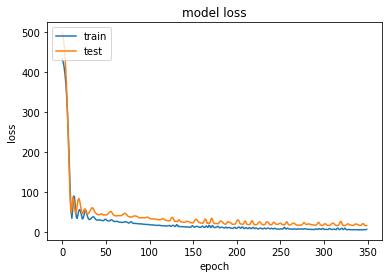

In [104]:
# Summarize history for loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.show()

In [105]:
model.fit(xFeatures, yTrain)
preds = model.predict(xFeatures)
mean_squared_error(yTrain, preds)
rmse = sqrt(mse)

print("MSE = ", mse)
print("RMSE = ", rmse)

MSE =  16.96153230073573
RMSE =  4.118438089948145


In [106]:
preds = model.predict(xValFeatures)
mse = mean_squared_error(yVal, preds)
rmse = sqrt(mse)

In [107]:
print("MSE = ", mse)
print("RMSE = ", rmse)

MSE =  20.772631017447935
RMSE =  4.557700189508733


In [108]:
model.get_params()

{'epochs': 350,
 'batch_size': 36,
 'verbose': 0,
 'build_fn': <function __main__.wrapper.<locals>.buildModel()>}

#### Comments

Again, if we were creating a production quality model we would have started with randomized parameter optimization process.  The results from that process would then lead to a set of smaller grids focusing more and more on whatever parameter option permutations showed the most promise.

You can see an example of this type of process I worked on previously [here](https://nbviewer.jupyter.org/github/nrasch/Portfolio/blob/master/Machine-Learning/Python/03-ComputerVision-Classification/Classification-03.ipynb).

Also, unless the randomized parameter optimization process were to lead to signifigant improvements from what we've seen so far we'd be better of utilizing the gradient boosting algorithm we utilized in [previous write-up](https://nbviewer.jupyter.org/github/nrasch/Portfolio/blob/master/Machine-Learning/Python/04-Classic-Datasets/Model-02.ipynb#Initial-pass---Ensemble-methods).

### Predictions

**NOTE**

Hopefully to same some one else some pain down the road:

I kept getting the following error when working on this prediction section, which frankly was driving me nuts:
    
```
TypeError: call() missing 1 required positional argument: 'inputs'
```

After researching the error message I came upon this comment which let me to the resolution:

_The thing here is that KerasRegressor expects a callable that builds a model, rather than the model itself. By wrapping your function in this way you can return the build function (without calling it)._  [Source](https://stackoverflow.com/questions/47944463/specify-input-argument-with-kerasregressor)

Solution:  I needed to **wrap** the `buildModel()` function!  :(

Once I 'wrapped' the `buildModel()` function the prediction code blocks finally started working, and that's why we have the `wrapper()` function implemented below...

**END NOTE**

And now that that's out of the way we'll take a look at some predictions using the test data set based on the tuning results from above.

In [120]:
# See NOTE above on why we have this new function
def wrapper(optimizer = 'Adam', lr = 0.001, decay = 0.0, epsilon = None):
    
    def buildModel():
        opt = None

        model = Sequential()

        # kernel_initializer='normal' -> Initializer capable of adapting its scale to the shape of weights
        # bias_initializer -> 'zeros' (default per the docs)

        model.add(Dense(20, input_dim = xTrain.shape[1], kernel_initializer='normal', activation = 'relu'))
        model.add(Dense(10, kernel_initializer='normal', activation = 'relu'))
        model.add(Dense(1, kernel_initializer='normal'))

        if optimizer.lower() == 'adam':
            opt = Adam(lr = lr, decay = decay, epsilon = epsilon)
        else:
            # Please don't ever use eval where you're recieving input from non-trusted sources!
            # A Jupyter notebook is OK; a public facing service is certainly not
            opt = eval(optimizer)()

        model.compile(loss = 'mean_squared_error', optimizer = opt)

        return model

    return buildModel

In [121]:
# Build the model, and pass the KerasRegressor a callable function to the 'build_fn' argument
# Use the parameters we found were most effective during the hyperparameter tuning
m =  KerasRegressor(
    build_fn = wrapper(optimizer = 'Adam', lr = 0.003, epsilon = 1), 
    epochs = 300, 
    batch_size = 32, 
    verbose = 0
)

# Now fit the model to the training data ensuring we perform the same sort of pipeline transformations
# that occured during the hyperparameter tuning (i.e. feature scaling)
xScaled = StandardScaler().fit(xTrain).transform(xTrain)
m.fit(xScaled, yTrain)

# Now we can finally make some predictions using our trained model on unseen data
xScaled = StandardScaler().fit(xTrain).transform(xVal)
preds = m.predict(xScaled)
mse = mean_squared_error(yVal, preds)
rmse = sqrt(mse)

print("MSE = ", mse)
print("RMSE = ", rmse)

MSE =  11.93922294223878
RMSE =  3.4553180667253747


In [33]:
makeRange(4, 68, 4)

[4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64]

In [29]:
xTrain.col()

AttributeError: 'numpy.ndarray' object has no attribute 'col'

In [36]:
makeRange(1, 9, 1, .001, 3)

[0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008]

In [37]:
makeRange(2, 8, 1, .5, 1)

[1.0, 1.5, 2.0, 2.5, 3.0, 3.5]

In [193]:
def test(a1, a2, a3):
    print(locals())

In [194]:
test(1, 2, 'abc')

{'a3': 'abc', 'a2': 2, 'a1': 1}
